# NUCLEI COUNT - BBBC002

### Libraries and Functions

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import napari_segment_blobs_and_things_with_membranes as nsbatwm

from matplotlib.pyplot import imshow
from skimage.io import imread
from skimage import filters
from sklearn.metrics import mean_squared_error

In [2]:
def laplacian_of_gaussian(image, sigma):
    """
    Applies a Gaussian kernel to an image and the Laplacian afterwards.
    """
    
    # blur the image using a Gaussian kernel
    intermediate_result = filters.gaussian(image, sigma)
    
    # apply the mexican hat filter (Laplacian)
    result = filters.laplace(intermediate_result)
    
    return result

In [3]:
def difference_of_gaussian(image, sigma1, sigma2):
    
    first = filters.gaussian(image, sigma = sigma1)
    second = filters.gaussian(image, sigma = sigma2)
    diff = first - second
    result = filters.gaussian(diff, sigma = ((sigma1 + sigma2)/2 ))
    return diff

In [4]:
def my_segmentation_algorithm(input_image, background_radius=10, spot_sigma=5, outline_sigma=1):

    # background subtraction
    background_subtracted = nsbatwm.white_tophat(input_image, 
                                                 radius=background_radius)
    
    # instance segmenation / labeling
    label_image = nsbatwm.voronoi_otsu_labeling(background_subtracted, 
                                                  spot_sigma=spot_sigma, 
                                                  outline_sigma=outline_sigma)

    return label_image

In [5]:
def plot_data(path, ground_truth, filter, method):
    
    # FILTER:
    ### insert 1 for no filter
    ### insert 2 for Laplacian-Gaussian
    ### insert 3 for Sobel
    ### insert 4 for Difference of Gaussian
    ### insert 5 for Binary Image (Otsu Threshold)
    
    # METHOD:
    ### insert 1 for voronoi-otsu labelling
    ### insert 2 for segmentation algorithm (only difference is background substraction)
    
    paths = os.listdir(path)
    sorted_list = sorted(paths, key=str.lower)
    del sorted_list[0]
    
    
    image_list = []
    for k in sorted_list:
        image_list.append(path+k)
    
    count=[]
    for i in image_list:

        
        if filter == 1:
            image = imread(i)
        elif filter ==2:
            image = imread(i)
            image = laplacian_of_gaussian(image, sigma=1)
        elif filter ==3:
            image = imread(i)
            image = filters.sobel(image)
        elif filter ==4:
            image = imread(i)
            image = difference_of_gaussian(image, 1,2)
        elif filter ==5:
            image = imread(i)
            image = nsbatwm.threshold_otsu(image)
        
        
        if method == 1:
            label_image = nsbatwm.voronoi_otsu_labeling(image, spot_sigma=6, outline_sigma=2)
        elif method ==2:
            label_image = my_segmentation_algorithm(image, background_radius=10, spot_sigma=5, outline_sigma=1)
            
            
            
   
        average_count = label_image.max()
        count.append(average_count)
    
    df = pd.DataFrame(ground_truth)
    df['Soft Count'] = count
    mean = (df['human counter 1 (Robert Lindquist)'] + df['human counter #2 (Joohan Chang)']) / 2

    # Using .loc to avoid SettingWithCopyWarning and assign the calculated mean to 'Human count Average'
    df.loc[:, 'Human count Average'] = mean

    # Print the updated DataFrame
    df = df.drop('human counter 1 (Robert Lindquist)', axis=1)
    df = df.drop('human counter #2 (Joohan Chang)', axis=1)
    df = df.drop('file name', axis=1)

    diff = (df['Soft Count'] - df['Human count Average']).abs()
    
    soft_count = df['Soft Count']
    exact_truth = df['Human count Average']
    rmse = mean_squared_error(soft_count, exact_truth, squared=False)
    
    for column in df.columns:
        # Get the x and y data
        x = df.index
        y = df[column]

        # Plot the data points using scatter plot style
        plt.scatter(x, y, marker='o', label=column)
    
    for i, (x, y1, y2, d) in enumerate(zip(df.index, df['Soft Count'], df['Human count Average'], diff)):
        plt.plot([x, x], [y1, y2], color='red', linewidth=1, linestyle='--')
        plt.annotate(f"{d:.2f}", (x, (y1 + y2) / 2), xytext=(4, 12), textcoords='offset points', color='red', fontsize=6, rotation=90)
        plt.text(0.5, -0.3, f'Mean Squared Error: {round((rmse), 2)}', transform=plt.gca().transAxes,
                ha='center', va='center', fontsize=12)
        
        

    
    plt.gcf().set_size_inches(12, 3)
    plt.legend(fontsize=6)
    plt.xlabel('Trial', fontsize =6)
    plt.ylabel('Nuclei Count', fontsize = 6)
    
    return rmse

In [6]:
data = {"file name": [
        "CPvalid1_340_40x_Tiles_p0002DAPI",
        "CPvalid1_340_40x_Tiles_p0109DAPI",
        "CPvalid1_340_40x_Tiles_p0244DAPI",
        "CPvalid1_340_40x_Tiles_p0378DAPI",
        "CPvalid1_340_40x_Tiles_p0540DAPI",
        "CPvalid1_340_40x_Tiles_p0702DAPI",
        "CPvalid1_340_40x_Tiles_p0865DAPI",
        "CPvalid1_340_40x_Tiles_p1013DAPI",
        "CPvalid1_340_40x_Tiles_p1175DAPI",
        "CPvalid1_340_40x_Tiles_p1365DAPI",
        "CPvalid1_48_40x_Tiles_p0003DAPI",
        "CPvalid1_48_40x_Tiles_p0151DAPI",
        "CPvalid1_48_40x_Tiles_p0313DAPI",
        "CPvalid1_48_40x_Tiles_p0529DAPI",
        "CPvalid1_48_40x_Tiles_p0719DAPI",
        "CPvalid1_48_40x_Tiles_p0881DAPI",
        "CPvalid1_48_40x_Tiles_p1016DAPI",
        "CPvalid1_48_40x_Tiles_p1205DAPI",
        "CPvalid1_48_40x_Tiles_p1394DAPI",
        "CPvalid1_48_40x_Tiles_p1583DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0002DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0081DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0190DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0338DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0447DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0582DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0717DAPI",
        "CPvalid1_Anillin_40x_Tiles_p0852DAPI",
        "CPvalid1_Anillin_40x_Tiles_p1069DAPI",
        "CPvalid1_Anillin_40x_Tiles_p1286DAPI",
        "CPvalid1_mad2_40x_Tiles_p0004DAPI",
        "CPvalid1_mad2_40x_Tiles_p0044DAPI",
        "CPvalid1_mad2_40x_Tiles_p0125DAPI",
        "CPvalid1_mad2_40x_Tiles_p0260DAPI",
        "CPvalid1_mad2_40x_Tiles_p0394DAPI",
        "CPvalid1_mad2_40x_Tiles_p0841DAPI",
        "CPvalid1_mad2_40x_Tiles_p0853DAPI",
        "CPvalid1_mad2_40x_Tiles_p0880DAPI",
        "CPvalid1_mad2_40x_Tiles_p0907DAPI",
        "CPvalid1_mad2_40x_Tiles_p1072DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p0003DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p0016DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p0098DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p0151DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p0219DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p1540DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p1648DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p1703DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p1730DAPI",
        "CPvalid1_nodsRNA_40x_Tiles_p1745DAPI"
    ],
    "human counter 1 (Robert Lindquist)": [
        17, 14, 10, 9, 9, 17, 7, 10, 15, 9, 23, 14, 11, 18, 7, 15, 13, 10, 18, 18,
        32, 21, 39, 34, 26, 47, 40, 43, 32, 28, 137, 106, 127, 72, 134, 172, 148,
        141, 187, 153, 119, 114, 126, 156, 187, 106, 117, 144, 159, 149
    ],
    "human counter #2 (Joohan Chang)": [
        19, 19, 17, 18, 14, 20, 11, 13, 19, 14, 24, 17, 13, 21, 9, 18, 14, 13, 20, 
        21,  47, 32, 51, 53, 50, 71, 55, 68, 42, 46, 128, 101, 120, 75, 132, 160,
        142, 126, 183, 146, 119, 112, 126, 159, 182, 107, 115, 144, 158, 147
    ]
}

### Counting 

In [7]:
path = 'data/drosophila_kc167_1_images/'


 Filter 1


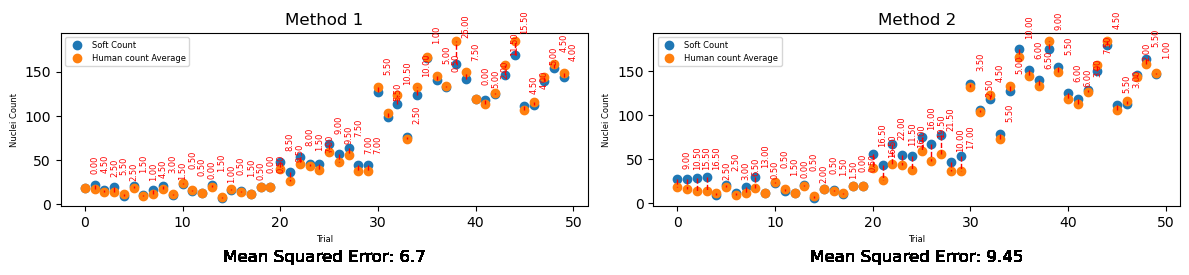


 Filter 2


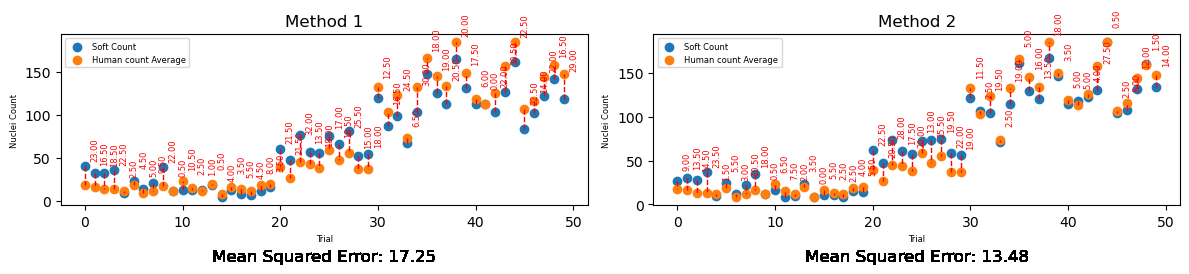


 Filter 3


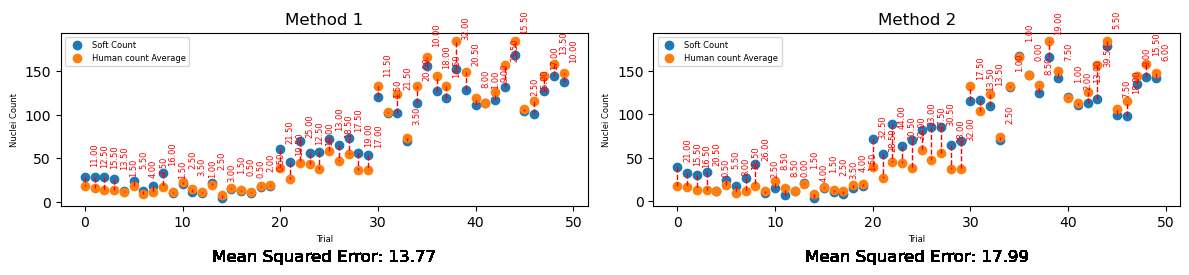


 Filter 4


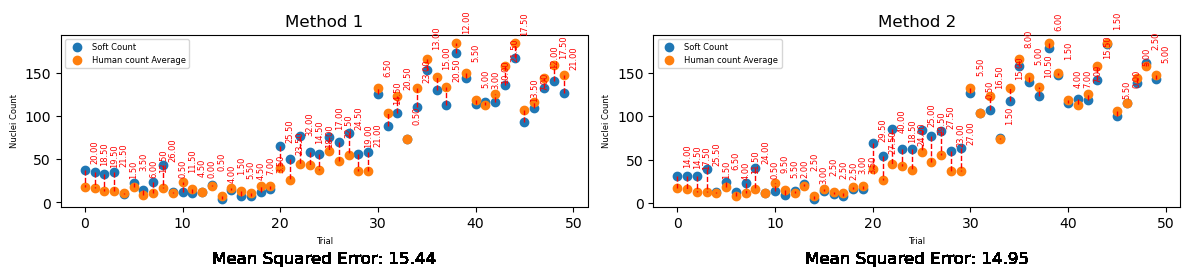


 Filter 5


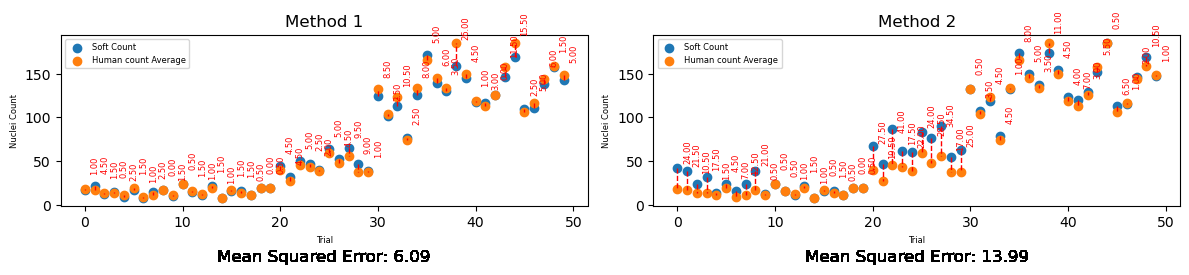

In [8]:
fig = plt.figure(figsize=(3, 2))
method1 = []
method2 = []

for i in range(1,6): #Trying each filter for each method
    print(f"\n Filter {i}")
    
    # First Plot
    plt.subplot(1, 2, 1)
    plt.title("Method 1")
    first = plot_data(path, data, i, 1) # counting function
    method1.append(first)

    # Second plot
    plt.subplot(1, 2, 2)
    plt.title("Method 2")
    second = plot_data(path, data, i, 2) # counting function
    method2.append(second)
    
    plt.tight_layout()
    plt.show()

### Analysis of Results

In [9]:
results = pd.DataFrame()
results['Method 1: Voronoi-Otsu']=method1
results['Method 2: Segmentation Algorithm']=method2
results.index = range(1, len(results) + 1)

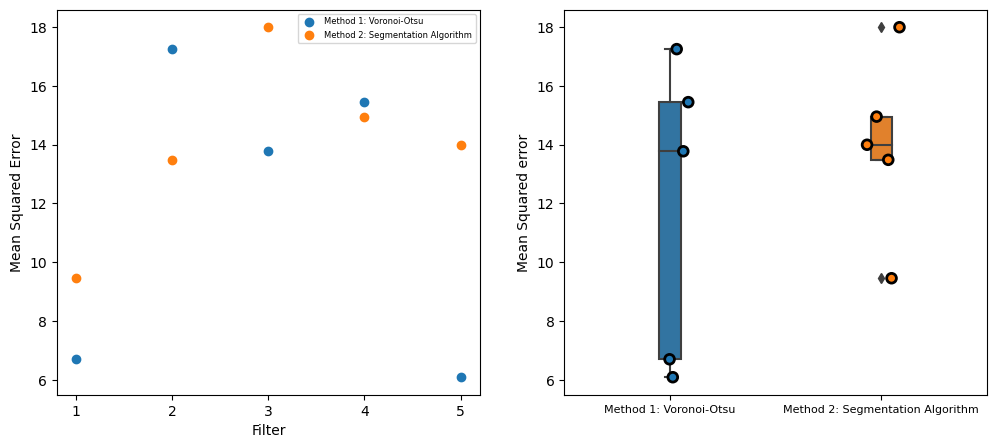

In [10]:
fig = plt.figure(figsize = (12,5))
plt.subplot(1,2,2)
sns.stripplot(results, size=7, linewidth= 2, edgecolor='black') # Comparing two methods
sns.boxplot(results, width= 0.1)
plt.xticks(fontsize = 8)
plt.ylabel('Mean Squared error')


for column in results:
    x = results.index
    y = results[column]
    
    plt.subplot(1,2,1)
    plt.scatter(x, y, marker='o', label=column) # Comparing five filters
    plt.xlabel('Filter')
    plt.xticks(results.index)
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='upper right', fontsize = 6)

In [11]:
results.describe()

,Method 1: Voronoi-Otsu,Method 2: Segmentation Algorithm
count,5.000000,5.000000
mean,11.848909,13.974179
std,5.135702,3.073135
min,6.086460,9.453306
25%,6.696641,13.481283
50%,13.771892,13.993749
75%,15.442960,14.950752
max,17.246594,17.991804


17.991803689458152

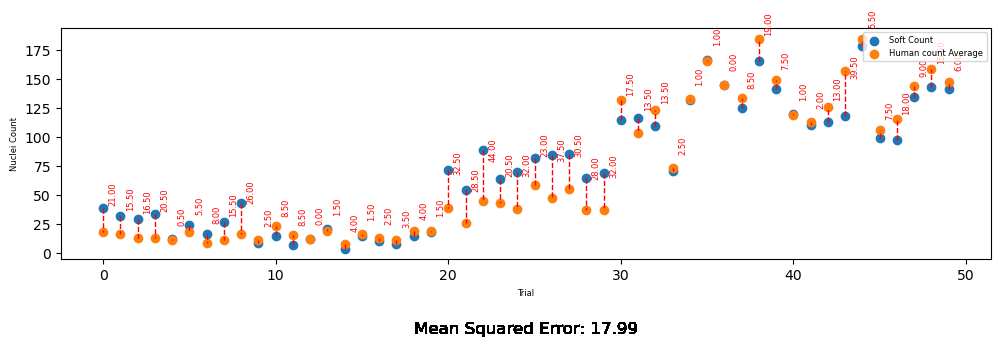

In [13]:
plot_data(path, data, 3,2)